In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn import linear_model
from scipy import stats


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generalized Linear Models w Sklearn

In [2]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East_Midlands 4.89 3.34
West_Midlands 5.63 3.47
East_Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern_Ireland 4.02 4.56'''

Wczytajmy nasze dane

In [3]:
# Read in the data. Note that for Python 2.x,
# you have to change the "import" statement
from io import StringIO
df = pd.read_csv(StringIO(data_str), sep=r'\s+')
data = np.matrix( df )
df.head()

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East_Midlands,4.89,3.34
4,West_Midlands,5.63,3.47


In [7]:
data

matrix([['North', 6.47, 4.03],
        ['Yorkshire', 6.13, 3.76],
        ['Northeast', 6.19, 3.77],
        ['East_Midlands', 4.89, 3.34],
        ['West_Midlands', 5.63, 3.47],
        ['East_Anglia', 4.52, 2.92],
        ['Southeast', 5.89, 3.2],
        ['Southwest', 4.79, 2.71],
        ['Wales', 5.27, 3.53],
        ['Scotland', 6.08, 4.51],
        ['Northern_Ireland', 4.02, 4.56]], dtype=object)

In [8]:
data[:,1] # wszystkie wiersze, 1 kolumna

matrix([[6.47],
        [6.13],
        [6.19],
        [4.89],
        [5.63],
        [4.52],
        [5.89],
        [4.79],
        [5.27],
        [6.08],
        [4.02]], dtype=object)

In [9]:
data[:,2] # wszystkie wiersze, 2 kolumna

matrix([[4.03],
        [3.76],
        [3.77],
        [3.34],
        [3.47],
        [2.92],
        [3.2],
        [2.71],
        [3.53],
        [4.51],
        [4.56]], dtype=object)

# Zadanie
Zdefiniujmy dwa modele liniowe na danych bez ostatniego elementu i danych pełnych.

Porównaj wyniki za pomocą miary $R^2$.

In [10]:
model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model1.fit(data[:,1],data[:,2])

model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(data[:,1],data[:,2])

model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model3.fit(data[:,1],data[:,2])

model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(data[:,1],data[:,2])

model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(data[:,1],data[:,2])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

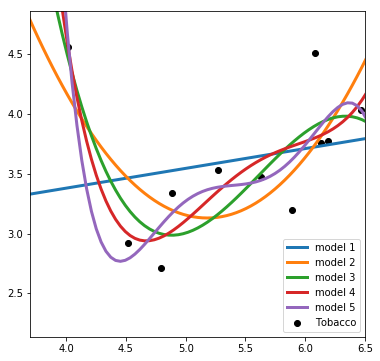

In [16]:
plt.figure(figsize=(6,6));
axes = plt.gca()
#axes.set_xlim([0,3])
#axes.set_ylim([0,8])
plt.scatter(df.iloc[:,1], df.iloc[:,2],  color='black')
x_plot = np.vstack(np.linspace(3, 7, 100))
plt.plot(x_plot, model1.predict(x_plot),linewidth=3, label='model 1')
plt.plot(x_plot, model2.predict(x_plot),linewidth=3, label='model 2')
plt.plot(x_plot, model3.predict(x_plot),linewidth=3, label='model 3')
plt.plot(x_plot, model4.predict(x_plot),linewidth=3, label='model 4')
plt.plot(x_plot, model5.predict(x_plot),linewidth=3, label='model 5')
plt.legend()

plt.axis("equal")
plt.xlim(3.7,6.5)
plt.ylim(2.5,4.5)
plt.show()

In [12]:
from sklearn import  metrics

print("Mean squared error: {}".format( metrics.mean_squared_error(data[:,2], model1.predict(data[:,1])) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(data[:,2], model2.predict(data[:,1])) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(data[:,2], model3.predict(data[:,1])) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(data[:,2], model4.predict(data[:,1])) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(data[:,2], model5.predict(data[:,1])) ))

Mean squared error: 0.30135905214662245
Mean squared error: 0.163007511825589
Mean squared error: 0.10803229626408091
Mean squared error: 0.09355676206736198
Mean squared error: 0.07977578943998558


In [13]:
print("R^2: {}".format(metrics.r2_score(data[:,2], model1.predict(data[:,1]))))
print("R^2: {}".format(metrics.r2_score(data[:,2], model2.predict(data[:,1]))))
print("R^2: {}".format(metrics.r2_score(data[:,2], model3.predict(data[:,1]))))
print("R^2: {}".format(metrics.r2_score(data[:,2], model4.predict(data[:,1]))))
print("R^2: {}".format(metrics.r2_score(data[:,2], model5.predict(data[:,1]))))

R^2: 0.04998449027586893
R^2: 0.4861290433031219
R^2: 0.6594349621459032
R^2: 0.7050681757509627
R^2: 0.7485118275737108
